In [2]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

In [3]:
data=pd.read_csv('labeled_tweets.csv')

In [4]:
v = TfidfVectorizer(max_features=1000000)
X=data['full_text']
X = v.fit_transform(X)
X.shape

(11090, 17712)

In [7]:
data['target']=data['label'].apply(lambda x: 1 if x=='Offensive' else 0)
data

,id,label,full_text,target
0,572342978255048705,Offensive,So Drasko just said he was impressed the girls...,1
1,572342978255048705,Offensive,So Drasko just said he was impressed the girls...,1
2,572341498827522049,Offensive,Drasko they didn't cook half a bird you idiot ...,1
3,572341498827522049,Offensive,Drasko they didn't cook half a bird you idiot ...,1
4,572340476503724032,Offensive,Hopefully someone cooks Drasko in the next ep ...,1
...,...,...,...,...
11085,576255143101882368,Non-offensive,RT @Transition: @freebsdgirl just so I’m clear...,0
11086,576481461424934912,Non-offensive,RT @Leonard_Delaney: @freebsdgirl I know! Holy...,0
11087,576607445692256256,Non-offensive,"FLOSS Weekly, open source projects, and paying...",0
11088,572268344394399744,Non-offensive,RT @Kasparov63: My WSJ article on Boris Nemtso...,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,data['target'], test_size=0.30, 
                                                    random_state=101)

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
pred = knn.predict(X_test)

In [12]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2423
           1       0.67      0.59      0.63       904

    accuracy                           0.81      3327
   macro avg       0.76      0.74      0.75      3327
weighted avg       0.80      0.81      0.81      3327



In [13]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

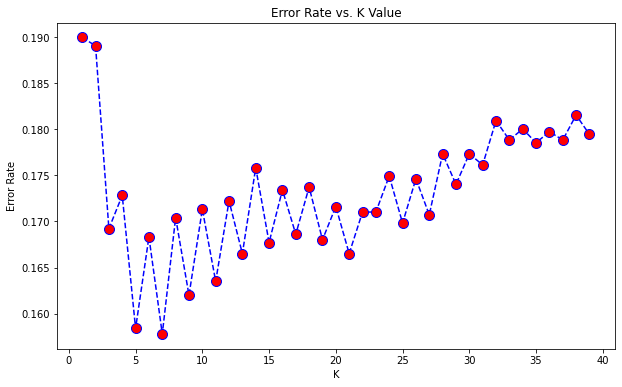

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')


print(classification_report(y_test,pred))

WITH K=7


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2423
           1       0.85      0.51      0.64       904

    accuracy                           0.84      3327
   macro avg       0.85      0.74      0.77      3327
weighted avg       0.84      0.84      0.83      3327



In [17]:
accuracy_score(pred,y_test)

0.842200180342651